In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Standardization vs Normalization

- Generally In data we have different units

- We have data has different values varies from -inf to inf

- We need to make all the column values is a kind of unit less as well as under the same range

- We two methods

     - Normalization
    
     - Standardization
        
- Normalization

     - Min max scalar

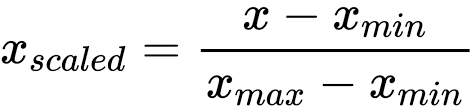

- Standardization

   - Z-score

<img src="https://www.simplypsychology.org/wp-content/uploads/Z-score-formula.jpg" jsaction="VQAsE" class="sFlh5c pT0Scc iPVvYb" style="max-width: 435px; height: 355px; margin: 0px; width: 435px;" alt="Z-Score: Definition, Formula, Calculation &amp; Interpretation" jsname="kn3ccd" aria-hidden="false">

In [3]:
# Import packages and read the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Read the data
file_path="C:\\Users\\lenovo\\Desktop\\Data Science course\\Data Files\\Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Method-1 MinmaxScalar()**

In [5]:
# step-1: min value of the column:x_min
# step-2: max value of the column :x_max
# step-3: Dr: x_max-x_min
# step-4: Nr: x-m_min
# step-5: Nr/Dr

min_wage=visa_df['prevailing_wage'].min()
max_wage=visa_df['prevailing_wage'].max()
dr=max_wage-min_wage
nr=visa_df['prevailing_wage']-min_wage
visa_df['prevailing_wage_norm']=nr/dr

In [6]:
visa_df[['prevailing_wage','prevailing_wage_norm']]

,prevailing_wage,prevailing_wage_norm
0,592.2029,0.001849
1,83425.6500,0.261345
2,122996.8600,0.385312
3,83434.0300,0.261371
4,149907.3900,0.469616
...,...,...
25475,77092.5700,0.241505
25476,279174.7900,0.874579
25477,146298.8500,0.458311
25478,86154.7700,0.269895


In [7]:
max_id=visa_df['prevailing_wage'].idxmax()
min_id=visa_df['prevailing_wage'].idxmin()
max_id,min_id
# Id means which has maximum value

(21077, 20575)

In [8]:
visa_df['prevailing_wage'].iloc[[max_id,min_id]]

21077    319210.2700
20575         2.1367
Name: prevailing_wage, dtype: float64

In [9]:
visa_df['prevailing_wage_norm'].iloc[[max_id,min_id]]

21077    1.0
20575    0.0
Name: prevailing_wage_norm, dtype: float64

**Package name**: MinMaxScalar()
    
- It is from skleran family

- In that sklearn we have preprocessing

- Under preprocessing we have MinMaxScalar() method

- Step1: Read the package
    
- Step-2: Save the package
    
- Step-3: Apply fit_transform

In [10]:
#Read the data
file_path="C:\\Users\\lenovo\\Desktop\\Data Science course\\Data Files\\Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit_transform(visa_df[['prevailing_wage']])

array([[0.00184853],
       [0.2613452 ],
       [0.385312  ],
       ...,
       [0.45831136],
       [0.26989486],
       [0.22203311]])

In [11]:
visa_df['prevailing_wage']  # series
visa_df[['prevailing_wage']] # df

,prevailing_wage
0,592.2029
1,83425.6500
2,122996.8600
3,83434.0300
4,149907.3900
...,...
25475,77092.5700
25476,279174.7900
25477,146298.8500
25478,86154.7700


**Note**:
    
   - LableEncoder expecting a 1D array: series
        
   - Normalization and Standarization expecting as 2D array: dataframe

**Z-score**

In [13]:
# Step-1: calculate mean
# Step-2: Calculate std
# Step-3: Nr=x-mean
# Step-4: Nr/std

In [14]:
################### Read the data again #############################
file_path="C:\\Users\\lenovo\\Desktop\\Data Science course\\Data Files\\Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df


wage_mean=visa_df['prevailing_wage'].mean()
wage_std=visa_df['prevailing_wage'].std()
nr=(visa_df['prevailing_wage']-wage_mean)
visa_df['prevailing_wage_z']=nr/wage_std

In [15]:
visa_df[['prevailing_wage','prevailing_wage_z']]

,prevailing_wage,prevailing_wage_z
0,592.2029,-1.398510
1,83425.6500,0.169832
2,122996.8600,0.919060
3,83434.0300,0.169991
4,149907.3900,1.428576
...,...,...
25475,77092.5700,0.049923
25476,279174.7900,3.876083
25477,146298.8500,1.360253
25478,86154.7700,0.221504


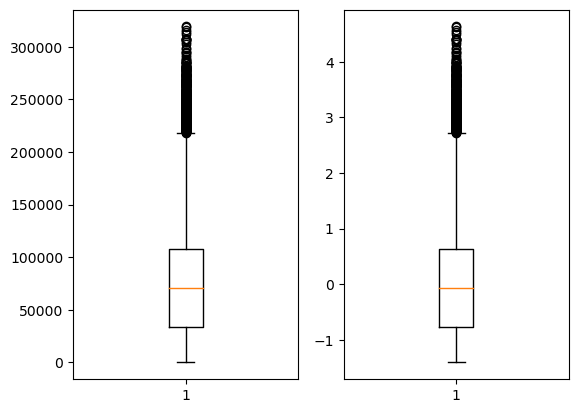

In [16]:
plt.subplot(1,2,1)
plt.boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2)
plt.boxplot(visa_df['prevailing_wage_z'])
plt.show()

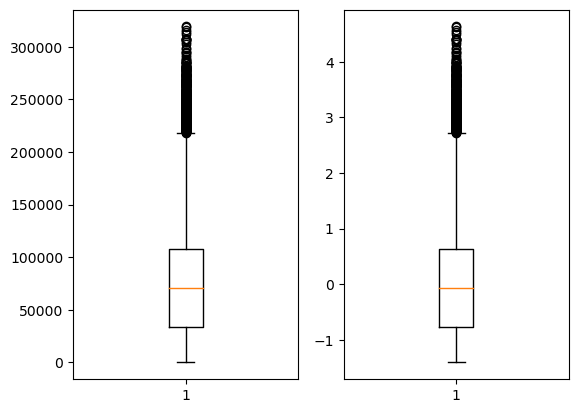

In [17]:
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage_z'])
plt.show()

**Standard Scalar**

In [18]:
# Step-1: read the package
# Step-2: save the package
# Step-3: Apply fit_transorm

############# Read the data again ################################
file_path="C:\\Users\\lenovo\\Desktop\\Data Science course\\Data Files\\Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
visa_df['prevailing_wage_ss']=ss.fit_transform(visa_df[['prevailing_wage']])

In [19]:
visa_df[['prevailing_wage','prevailing_wage_ss']]

,prevailing_wage,prevailing_wage_ss
0,592.2029,-1.398537
1,83425.6500,0.169835
2,122996.8600,0.919079
3,83434.0300,0.169994
4,149907.3900,1.428604
...,...,...
25475,77092.5700,0.049924
25476,279174.7900,3.876159
25477,146298.8500,1.360280
25478,86154.7700,0.221509


- Z score

- Z-transformation

- Standardization

- Standard scalar

- 3 to 3 : 99.7%
    
- Generally Normalization used in Deep learning 

- To convert color(0,255) image to gray(0,1)

- Standardization used in ML